In [1]:
from pandas import read_table
import os
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregando Dados e Criando o Dataframe

In [2]:
URL = "H:\\Users\\admin\\Projects\\Desafios\\ONS\\Hackathon\\DadosPreparados\\Dados_SE_2021_Arm.xlsx"

from pandas import read_excel
df = read_excel(URL, engine='openpyxl')

# 2. Eliminando dados inexistentes (linhas em branco)

In [3]:
df.dropna(axis=0)

,Data,ENA_Armazenavel,A509,A517,A529,A531,A557,A603,A604,A607,...,A611,A618,A624,A625,A626,A629,A630,A635,A706,A744
197,2018-07-17,4.250520e+10,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.2,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,2018-11-13,1.166555e+11,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2
317,2018-11-14,1.051681e+11,0.0,0.0,0.0,32.8,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.6
318,2018-11-15,1.083932e+11,3.6,0.4,7.8,0.6,14.8,0.0,0.0,0.0,...,24.8,18.6,4.2,14.8,1.2,1.0,2.4,0.0,5.8,1.0
319,2018-11-16,1.091370e+11,0.2,28.8,1.0,0.0,34.6,19.2,9.0,0.0,...,0.0,21.2,1.6,0.0,2.2,0.0,12.6,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2020-01-12,1.447708e+11,0.4,48.2,6.4,27.8,0.2,68.2,6.0,0.0,...,5.0,14.2,13.4,40.8,11.8,4.2,1.0,8.0,7.8,0.2
742,2020-01-13,1.430632e+11,58.8,12.8,6.0,37.6,0.6,19.4,0.0,0.4,...,2.8,19.2,0.8,0.0,13.4,43.2,3.6,16.4,9.0,0.0
743,2020-01-14,1.482335e+11,0.6,0.8,0.0,0.0,2.0,11.4,5.8,0.8,...,0.6,5.0,0.4,0.2,0.4,0.4,0.4,0.2,0.2,0.0
744,2020-01-15,1.449151e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.2,0.0


# 3. Setup Inicial

In [4]:
from pycaret.regression import *
reg1 = setup(df, target = 'ENA_Armazenavel', session_id=123, log_experiment=True, experiment_name='ENA_Armazenavel')

,Description,Value
0,session_id,123
1,Target,ENA_Armazenavel
2,Original Data,"(1339, 21)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(937, 40)"


# 4. Model Baseline

In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,23256228066.5344,1206906146703851126784.0000,34667004719.2530,0.4273,1.7466,472566.4244,0.2040
catboost,CatBoost Regressor,23738975869.8104,1231602617359873343488.0000,35051738724.4807,0.4144,1.7517,481557.6858,0.8420
gbr,Gradient Boosting Regressor,23168518525.6394,1245963632317353426944.0000,35163960648.8754,0.4093,1.7496,488302.3196,0.0420
ridge,Ridge Regression,23014397132.8000,1262634061046689300480.0000,35399906508.8000,0.4013,1.7514,506382.9997,0.0060
lr,Linear Regression,23009149337.6000,1264271583944950153216.0000,35421748019.2000,0.4005,1.7516,506658.5336,0.4220
lasso,Lasso Regression,23009161625.6000,1264272062452410613760.0000,35421754982.4000,0.4005,1.7516,506658.7208,0.3300
lar,Least Angle Regression,23009245893.0548,1264276848674286862336.0000,35421828179.6740,0.4005,1.7516,506654.6667,0.0080
llar,Lasso Least Angle Regression,23009158589.4934,1264272141047732895744.0000,35421756328.2072,0.4005,1.7516,506658.8392,0.0080
lightgbm,Light Gradient Boosting Machine,25186480394.3200,1324548293072339075072.0000,36346828286.6454,0.3709,1.7570,486716.0151,0.0360
et,Extra Trees Regressor,24481580491.7569,1397897696576956006400.0000,37182194988.2507,0.3378,1.7699,553072.8081,0.1860


# 4. Criando Modelo

In [6]:
import numpy as np
rf = create_model('rf', fold =5) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23563483234.4429,1210126251365075517440.0000,34786868950.2961,0.4170,2.4626,1028087.9755
1,23300986618.1874,1111267359888707551232.0000,33335676982.6069,0.4498,1.6372,1668.3549
2,22338031976.5456,1098451676172209487872.0000,33142897824.0016,0.5037,2.1888,812846.9712
3,21781294890.9469,1093105202077208543232.0000,33062141522.8537,0.4415,0.8681,2.1978
4,25297343612.5492,1521580244016053616640.0000,39007438316.5064,0.3246,1.5764,520226.6225
Mean,23256228066.5344,1206906146703851126784.0000,34667004719.2530,0.4273,1.7466,472566.4244
SD,1206737226.6119,163027581294065778688.0000,2259409325.2761,0.0587,0.5515,417547.2378


In [7]:
print(len(rf))

100


# 5. Tunning de hiperparâmetros

In [8]:
tuned_model = tune_model(rf, n_iter=50) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20221541146.1418,1103448712790640689152.0000,33218198518.1412,0.4116,1.7764,1982.6846
1,22905452510.1901,1203325244107804114944.0000,34688978712.3779,0.4713,2.9896,2022550.2020
2,18905752039.3288,880174086554165575680.0000,29667728031.5525,0.5714,0.6192,0.7197
3,22605486690.4682,1107590462530149810176.0000,33280481705.2000,0.4212,2.2247,3064.0864
4,22722901139.9056,1249870911377724145664.0000,35353513423.3887,0.4294,2.3449,871340.5169
5,20807225532.1785,905621104932686266368.0000,30093539255.6722,0.6061,2.0268,892392.8403
6,24750042029.4873,1456843168305372200960.0000,38168614964.4623,0.2878,0.9204,2.5413
7,17430816071.3487,715540935726589280256.0000,26749596926.4322,0.5976,0.8062,1.9902
8,25423955716.2898,1653220042756669046784.0000,40659808690.6059,0.3765,0.8216,1.5916
9,21628801832.5752,1263102536671461638144.0000,35540153863.9250,0.3201,2.0911,1305168.1422


In [9]:
tuned_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.01,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=260, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

# 6. Ensemble Model

In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22461233152.0000,1335048762387570098176.0000,36538318848.0000,0.2881,1.7738,1816.7366
1,24699617280.0000,1361527254184229863424.0000,36898877440.0000,0.4018,2.9992,2078878.2500
2,20552337408.0000,960668395645190537216.0000,30994651136.0000,0.5322,0.6530,0.8000
3,21559459840.0000,1132563475072527892480.0000,33653579776.0000,0.4081,2.2278,3132.7549
4,22429016064.0000,1222402476707965566976.0000,34962874368.0000,0.4419,2.3299,781090.7500
5,21624559616.0000,981945511347214090240.0000,31336009728.0000,0.5729,2.0247,960710.1875
6,25280118784.0000,1508626217750707044352.0000,38841036800.0000,0.2625,0.9170,2.4211
7,17530918912.0000,672648844251035074560.0000,25935474688.0000,0.6218,0.8055,2.0363
8,28554672128.0000,1939683330272381632512.0000,44041834496.0000,0.2684,0.8465,1.6990
9,22917308416.0000,1293999296209018159104.0000,35972202496.0000,0.3035,2.0865,1240847.3750


In [11]:
bagged_dt = ensemble_model(lr, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22454269952.0000,1324796599310837874688.0000,36397756416.0000,0.2935,1.7729,1807.9324
1,24377618432.0000,1333506560990172413952.0000,36517208064.0000,0.4141,2.9992,2087709.5000
2,20850204672.0000,963302438477248856064.0000,31037114368.0000,0.5309,0.6523,0.8036
3,21799450624.0000,1154611058154552688640.0000,33979568128.0000,0.3966,2.2299,3151.2244
4,22489165824.0000,1221488668196074422272.0000,34949804032.0000,0.4423,2.3297,782118.1875
5,21855633408.0000,992752813446763905024.0000,31507980288.0000,0.5682,2.0248,958028.0625
6,25317136384.0000,1505869451828802879488.0000,38805532672.0000,0.2638,0.9151,2.3874
7,17442207744.0000,669059686454253322240.0000,25866188800.0000,0.6238,0.8061,2.0466
8,28352004096.0000,1923179607962905739264.0000,43854069760.0000,0.2747,0.8451,1.6799
9,22899171328.0000,1308224056369556226048.0000,36169379840.0000,0.2958,2.0886,1258251.8750


In [14]:
boosted_lr = ensemble_model(lr, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24153901056.0000,1331148222897802182656.0000,36484902912.0000,0.2901,1.7732,1817.9135
1,25655619584.0000,1430457379755925700608.0000,37821386752.0000,0.3715,3.0050,2009709.7500
2,23670446080.0000,1183127428782597603328.0000,34396618752.0000,0.4238,0.6848,0.8649
3,23703504896.0000,1266575470703075655680.0000,35588980736.0000,0.3381,2.2225,3026.0332
4,27081762816.0000,1538069485477060149248.0000,39218229248.0000,0.2978,2.3314,733885.6250
5,24495835136.0000,1184660341505763835904.0000,34418896896.0000,0.4848,2.0363,1030376.0000
6,26593169408.0000,1702165315512210292736.0000,41257308160.0000,0.1679,0.9100,2.1991
7,17911500800.0000,683867381291559157760.0000,26150858752.0000,0.6155,0.8063,1.9656
8,29804165120.0000,1902645586199398318080.0000,43619323904.0000,0.2824,0.8367,1.6475
9,23183802368.0000,1247345100294203637760.0000,35317772288.0000,0.3286,2.0881,1316046.7500


# 7. Integrando os modelos

In [15]:
blender = blend_models(boosted_lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22461235200.0000,1335048903125058453504.0000,36538322944.0000,0.2881,1.7738,1816.7367
1,24699621376.0000,1361527394921718218752.0000,36898881536.0000,0.4018,2.9992,2078878.2500
2,20552337408.0000,960668325276446359552.0000,30994649088.0000,0.5322,0.6530,0.8000
3,21559461888.0000,1132563615810016247808.0000,33653581824.0000,0.4081,2.2278,3132.7554
4,22429016064.0000,1222402476707965566976.0000,34962874368.0000,0.4419,2.3299,781090.7500
5,21624559616.0000,981945511347214090240.0000,31336009728.0000,0.5729,2.0247,960710.3125
6,25280118784.0000,1508626217750707044352.0000,38841036800.0000,0.2625,0.9170,2.4211
7,17530918912.0000,672648844251035074560.0000,25935474688.0000,0.6218,0.8055,2.0363
8,28554672128.0000,1939683330272381632512.0000,44041834496.0000,0.2684,0.8465,1.6990
9,22917308416.0000,1293999296209018159104.0000,35972202496.0000,0.3035,2.0865,1240847.2500


# 8. Stacking de Modelos

In [16]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5, exclude = models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22007704518.5911,1301400754394899939328.0000,36074932493.2826,0.3060,1.7752,1843.9091
1,25159340451.0028,1383614832156381020160.0000,37196973427.3688,0.3921,3.0028,2185571.9446
2,22096670125.9574,1032361664725740814336.0000,32130385380.9092,0.4973,0.6608,0.8198
3,22515447808.4189,1168673507152613081088.0000,34185867067.4390,0.3893,2.2264,3077.6538
4,23437624298.1805,1363408182344596324352.0000,36924357575.2456,0.3775,2.3346,805722.5876
5,21203883097.4956,957445581562926727168.0000,30942617561.5918,0.5836,2.0256,946906.4429
6,25256748612.5779,1501197878827230167040.0000,38745294925.0258,0.2661,0.9160,2.4299
7,17405948601.7392,658779426133123661824.0000,25666698777.4650,0.6296,0.8110,1.9905
8,28252484871.2076,1793102891944109408256.0000,42345045659.9601,0.3237,0.8370,1.6160
9,24693499915.8856,1433402820329177612288.0000,37860306659.2068,0.2284,2.0979,1374975.0207


# 9. Análise do Modelo

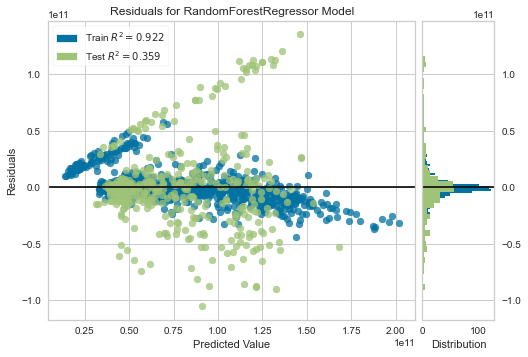

In [17]:
plot_model(rf)

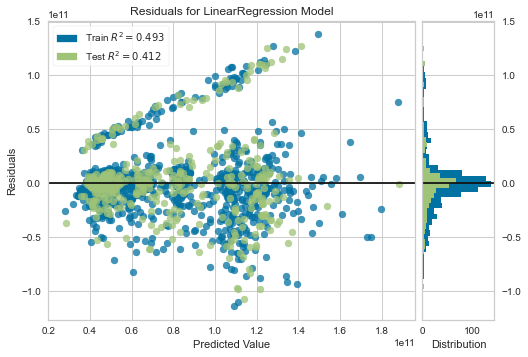

In [18]:
plot_model(lr)

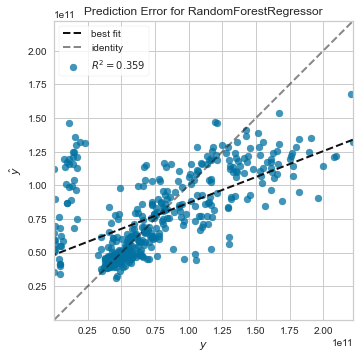

In [19]:
plot_model(rf, plot = 'error')

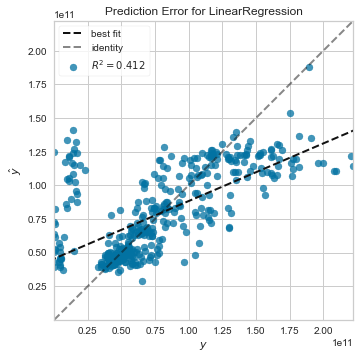

In [20]:
plot_model(lr, plot = 'error')

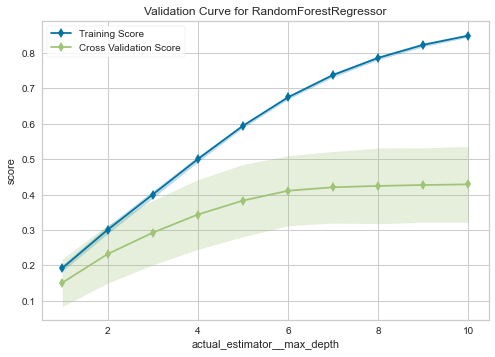

In [22]:
plot_model(rf, plot='vc')

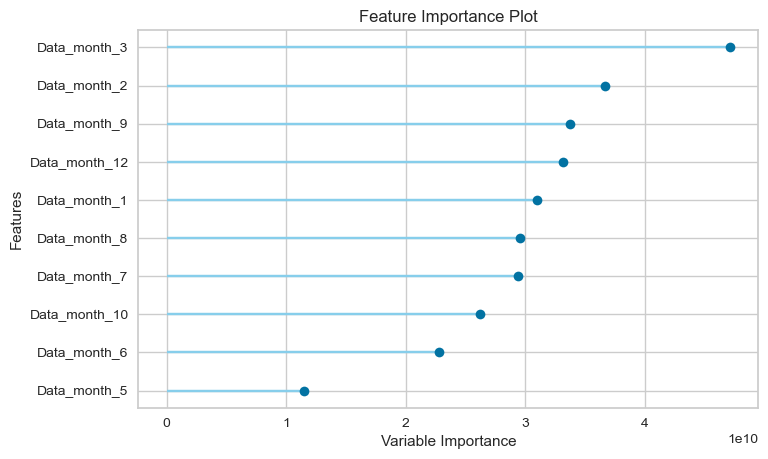

In [23]:
plot_model(lr, plot='feature')

In [24]:
evaluate_model(rf)

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


In [25]:
evaluate_model(lr)

,Parameters
copy_X,True
fit_intercept,True
n_jobs,-1
normalize,False


# 10. Interpretação do Modelo

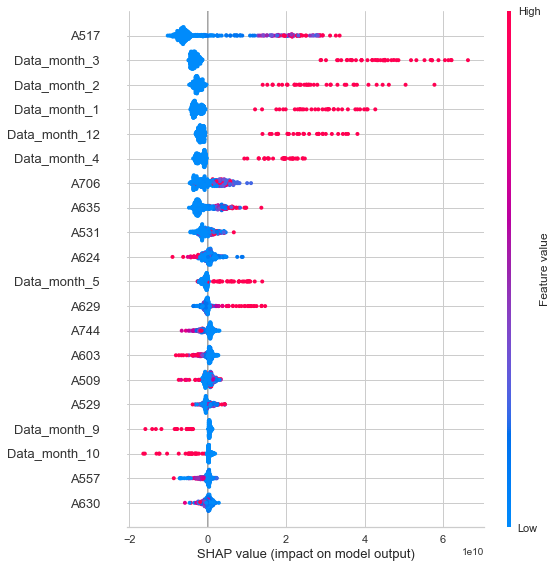

In [26]:
interpret_model(rf)

In [30]:
#interpret_model(rf, plot = 'correlation')

In [31]:
#interpret_model(rf, plot = 'reason', observation = 12)

# 11. AutoML()

In [36]:
best = automl(optimize = 'MAE')
best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.01,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=260, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

# 12. Modelo Preditivo

In [37]:
pred_holdouts = predict_model(rf)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,25019011682.9005,1439514333283161473024.0000,37940932161.4949,0.3589,2.1956,1102295.5093


,A509,A517,A529,A531,A557,A603,A604,A607,A610,A611,...,Data_weekday_1,Data_weekday_2,Data_weekday_3,Data_weekday_4,Data_weekday_5,Data_weekday_6,Data_is_month_end_0,Data_is_month_start_1,ENA_Armazenavel,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.71747,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.087830e+09,4.123788e+10
1,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,1.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.602760e+10,4.770296e+10
2,17.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.139182e+11,7.696304e+10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,8.147130e+09,1.138106e+11
4,0.2,10.0,0.0,0.0,3.4,0.0,8.0,0.0,0.0,0.00000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6.033110e+10,7.932267e+10


In [48]:
new_data = df.copy()
new_data.drop(['ENA_Armazenavel'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
#predict_new
predict_new.to_csv(r'H:\Users\admin\Projects\Desafios\ONS\Hackathon\Deliverables\Result\ena_predict.csv', encoding='utf-8', index=False)

# 13. Save / Load Model

In [49]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='ENA_Armazenavel',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mae', max_depth=9,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=No

In [50]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='ENA_Armazenavel',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mae', max_depth=9,
                                       max_features=1.0, max_leaf_nodes=None,
                

In [51]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=True,
                     features_todrop=[], id_columns=[], ml_usecase='regression',
                     numerical_features=[], target='ENA_Armazenavel',
                     time_features=[])

In [52]:
from sklearn import set_config
set_config(display='text')

# 14. Get Config / Set Config

In [53]:
X_train = get_config('X_train')
X_train

,A509,A517,A529,A531,A557,A603,A604,A607,A610,A611,...,Data_month_9,Data_weekday_0,Data_weekday_1,Data_weekday_2,Data_weekday_3,Data_weekday_4,Data_weekday_5,Data_weekday_6,Data_is_month_end_0,Data_is_month_start_1
1251,0.0,0.0,0.0,0.2,0.200000,0.0,2.857534,0.6,6.174414,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
417,12.0,0.4,2.4,24.0,0.200000,0.2,0.200000,0.2,0.600000,0.00000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50,5.0,1.2,3.0,1.2,0.000000,0.2,0.000000,5.0,1.200000,1.20000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
300,0.2,1.6,0.4,0.4,0.000000,9.6,1.600000,25.0,8.600000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
908,22.4,0.0,6.6,8.6,0.200000,0.0,0.000000,0.0,6.174414,2.71747,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0.4,0.0,0.2,0.2,0.000000,0.0,2.857534,0.0,6.174414,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1147,13.6,11.4,0.0,0.0,6.800000,2.4,1.400000,1.6,6.174414,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
106,0.2,0.8,0.0,0.0,0.200000,3.0,2.857534,3.2,5.800000,0.20000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1041,0.0,0.0,0.0,0.0,3.674092,0.0,2.857534,0.0,6.174414,2.71747,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
